In [ ]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

# Question 1
Consider the approximation to the first derivative
$$ f'(a) \approx  \frac{f(a+h) - f(a )}{h}.$$
The discretization error for this formula is $O(h)$. Suppose that the absolute error in evaluating the function $f$ is bounded by machine epsilon, $\epsilon$, with
$$ \vert \hat{f}(x) - f(x) \vert \leq \epsilon, $$
where $\hat{f}(x)$ is the floating point approximation of the exact function evaluation $f(x)$. For simplicity, let us ignore the errors generated in basic arithmetic operations.   Suppose further that there is a constant $M>0$ such that $\vert f’’(x)\vert \leq M$ for all $x$.

**Ignore the floating point error in approximating $h$ with a floating point value in the denominator.**

## A. 
Show that the total computational error (truncation and rounding combined) is bounded by
$$ \frac{Mh}{2} + \frac{2\epsilon}{h}.$$ 

---------------------------------------
## Solution
The first part is the discretization error we derived in Homework 2. The second part,
$$ \mathcal{E}_{\rm roundoff} = \frac{2\epsilon}{h},$$
is due to roundoff error. The second term follows from the bound on error in evaluating the function. Using the triangle inequality, we have
\begin{align}
\frac{\vert f({\rm fl}(a+h)) - f({\rm fl}(a) ) -  (f(a+h) - f(a ))\vert}{h} 
 & \leq \frac{\vert f({\rm fl}(a+h)) - f(a+h)\vert  + \vert f({\rm fl}(a) ) -  f(a )\vert )\vert}{h} \\
 & \leq \frac{\epsilon + \epsilon}{h} = \frac{2\epsilon}{h}.
\end{align}

## B. 
Treat the above bound as an approximation of the absolute error. At what value of $h$ is the error estimate in part A minimized?

---------------------------------------
## Solution
Take the derivative of the total error with respect to $h$, set it to zero, and solve for $h_{\rm opt}$,
$$ \frac{M}{2} - \frac{2\epsilon}{h_{\rm opt}^2} = 0,$$
which yields
$$h_{\rm opt} = \sqrt{\frac{4\epsilon}{M}} .$$

## C. 
Copy and paste Example 2 in the Week 2 Python notebook into a new notebook. Plot the error estimate derived in part A (again treating the bound as an approximation) along with the empirical computational error (the numerically computed error) and the estimate of the discretization error (both of these are already plotted in the example). Is the error estimate from part A a better error estimate? Why? Plot the minimum predicted in part B. Does it agree with the minimum of the empirical error? **For the graph, use $\epsilon = 10^{-16}$ and $M = |f''(a)|$.**

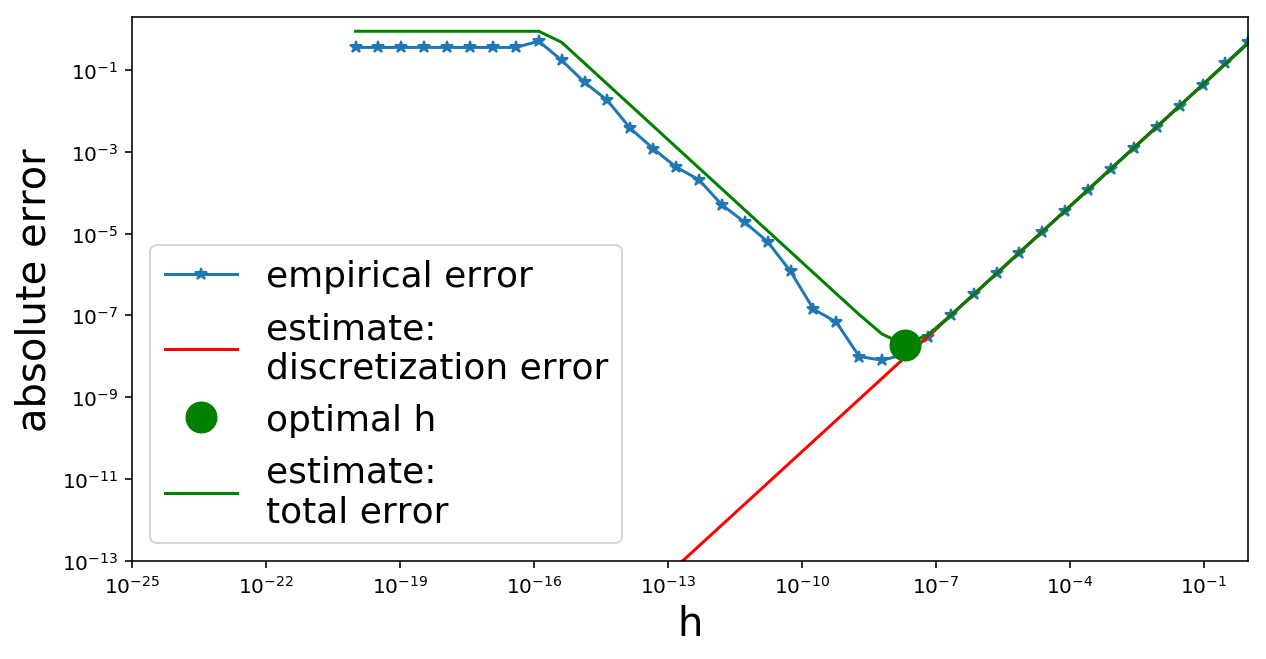

In [3]:
x0 = 1.2 ## point that we compute the derivative at (ie d/dx sin(x) at x = x0)
f0 = sin(x0) ## f(x0)
fp = cos(x0) ## f'(x0) the `p` means 'prime'
fpp = -sin(x0) ## f''(x0)

i = linspace(-20, 0, 40) ## `linspace` gives a range of values between two end points
##                          in this case 40 points, between -20 and 0
h = 10.0**i ## this is our approx parameter, it is an array of values 
##             between 10^(-20) and 10^(0)
fp_approx = (sin(x0 + h) - f0)/h ## the derivative approximation
err = absolute(fp - fp_approx) ## the full absolute error
d_err = h/2*absolute(fpp) ## the formula for the discretization error, derived above

### New code here
machine_epsilon = np.finfo(float).eps # 2.2e-16
epsilon = 1e-16
M = absolute(fpp)
h_opt = sqrt(4.*epsilon/M)
err_opt = M*h_opt/2. + 2.*epsilon/h_opt
err_tot = M*h/2. + 2.*epsilon/h
## we can get a slightly improved error estimate if we account for the fact 
## that h = epsilon_machine ~ 2e-16 is the lowest possible value that can
## be achieved
err_max_from_underflow = 2.*epsilon/machine_epsilon
err_tot_clipped = clip(err_tot, -inf, err_max_from_underflow)
####################
            
figure(1, [10, 5]) ## creates a blank figure 7 inches (wide) by 5 inches (height)
loglog(h, err, '-*', label='empirical error') ## makes a plot with a double log scale
loglog(h, d_err, 'r-', label='estimate:\ndiscretization error')

### New code here
loglog(h_opt, err_opt, 'og', ms=15, label='optimal h')
loglog(h, err_tot_clipped, 'g', label='estimate:\ntotal error')
####################

### some new code below too, but just plotting stuff
xlabel('h', fontsize=20) ## puts a label on the x axis
ylabel('absolute error', fontsize=20) ## puts a label on the y axis
xlim(1e-25, 1e0)
ylim(1e-13, 2) ## places limits on the yaxis for our plot
legend(loc='lower left', fontsize=18); ## creates a figure legend (uses the `label=...` 
                                       ## arguments in the plot command)

# Question 2
Suppose we invent a new representation for finite precision real numbers based on rational numbers instead of floating point numbers. Rational numbers are dense on the reals, and we can approximate any real number to any desired precision with a rational number. For this to work, our data structure must use only integers and arithmetic operations ($+,-,\cdot, /$) on integers. 

Let $x = I_1 / I_2$ where $I_1$ and $I_2$ are 16bit integers. Assume for simplicity that $0 \leq I_1 \leq I_{\rm max}$ and $0 < I_2 \leq I_{\rm max}$. Hence, each real number represented in finite precision with our new system uses 32bits to store in memory.

## A
Devise formulas to perform addition, multiplication, and division that use only arithmetic operations on integers. Arithmetic operations should take as input two numbers in our format and return a single new number also in our format. For example, if $x_1 = I_{11}/I_{21}$ and $x_2 = I_{12}/I_{22}$, then $x_1 + x_2 = x_3$, where $x_3$ is expressed as the ratio of two integers. For each operation, you need to write $x_3$ as the ratio of two integers each of which are functions of the integers $I_{11},I_{21}, I_{12}, I_{22}$.

---------------------------------------
## Solution
Assume the output of a given operation is $y = y_1/y_2$ for integers $y_1$ and $y_2$.
  1. Multiplication $x_1x_2$:
  $$ y_{1} = I_{11}I_{12},\quad y_2 = I_{21}I_{22} $$
  2. Division $x_1/x_2$:
  $$y_{1} = I_{11}I_{22},\quad y_2 = I_{21}I_{12}$$
  3. Addition and subtraction $x_1 \pm x_2$:
  $$ y_{1} = I_{11}I_{22} \pm I_{12}I_{21}, \quad y_{2} = I_{21}I_{22}$$

## B
What is $I_{max}$ for a non negative 16bit integer?

---------------------------------------
## Solution
$$ 2^{16} - 1 = 65,535 $$

## C
What is the smallest possible nonzero value that can be represented by our numbers (remember that we are assuming they are non negative)?

---------------------------------------
## Solution
$$\approx 2^{-16} \approx 10^{-5}$$

## D 
What is the largest possible value that can be represented by our numbers?

---------------------------------------
## Solution
$$\approx 2^{16} \approx 10^5$$

## E
What is the smallest (in absolute value) possible absolute difference between two numbers $x_1$ and $x_2$ such that $x_1 \neq x_2$? 

---------------------------------------
## Solution
Not shown

## F
What is the smallest (in absolute value) possible relative difference between two numbers $x_1$ and $x_2$ such that $x_1 \neq x_2$? Use the following for relative difference $$\frac{|x_1 - x_2| }{ \max(x_1, x_2)}$$

---------------------------------------
## Solution
Not shown

---------------------------------------
## Solution

## G 
How do the above answers compare to 32bit floating point numbers? Is this a good way to represent real numbers on a computer? Why or why not?

---------------------------------------
## Solution
Our numbers based on rational numbers are not nearly as good as 32 bit floating point numbers.
  1. The range of values is much smaller. The larges values are $\approx 10^5$ compared to $\approx 10^{38}$ for 32bit float. The smallest values follow a similar trend.
  2. The accuracy, or machine epsilon, is much larger
  3. Several students pointed out that the floating point operations would likely be much slower